In [ ]:
#importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#lectura

import gdown

url = 'https://drive.google.com/uc?id=10rj_UbqqMDBXCzX0XhNzbNWGUrdns63B'
output = 'olist_customers_dataset.csv'
gdown.download(url, output, quiet=False)

# Ahora lee el archivo CSV
data = pd.read_csv(output, sep=';')

Downloading...
From: https://drive.google.com/uc?id=10rj_UbqqMDBXCzX0XhNzbNWGUrdns63B
To: /content/olist_customers_dataset.csv
100%|██████████| 9.68M/9.68M [00:00<00:00, 49.7MB/s]


In [ ]:
print(data.shape)
data.head()


(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#Variables categoricas y numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Limpieza:
1. Datos faltantes en celdas.
2. columnas irrelevantes
3. Registros (filas) repetidos
4. Valores extremos (outliers) en caso de variables numericas. Se deben analizar en detalle pues no necesariamente hay que eliminarlos.
5. Errores ortograficos en el caso de variables categoricas.

In [ ]:
#Datos faltantes(elimino)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
columnas=[]

for e in data:
  columnas.append(e)

print(columnas)

['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [ ]:
#Conteo de los niveles en las diferentes columnas categoricas

for col in columnas:
  print(f'Columna {col}:{data[col].nunique()}subniveles')

Columnacustomer_id:99441subniveles
Columnacustomer_unique_id:96096subniveles
Columnacustomer_zip_code_prefix:14994subniveles
Columnacustomer_city:4118subniveles
Columnacustomer_state:27subniveles


In [ ]:
data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set despues de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (99441, 5)
Tamaño del set despues de eliminar las filas repetidas: (99441, 5)


no habia duplicadas

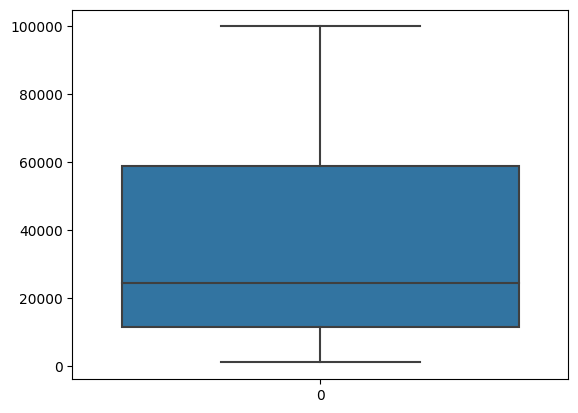

In [ ]:
#Outliers en las variables numericas
#Grafica tipo boxplot


sns.boxplot(data=data['customer_zip_code_prefix'])

plt.show()

